In [1]:
from ast import literal_eval

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data/processed/mumbai.csv')
print(df.shape)
df.head()

(9514, 30)


,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
0,69306824,X69306824,Mumbai Beyond Thane,3.25 Cr,32500001,32500001,477941.0,74051 sq.ft.,6879.56 sq.m.,6879.560053,...,1,4,6,1.0,"44,23,45,12,24,46,25,47,26,19,1,40,41,42,32",3.0,"32,44,23,45,24,46,47,19,1,40,41,42,12,25,26,10...",NaN,1.0,NaN
1,70915032,R70915032,Navi Mumbai,4.15 L,415000,415000,381.0,1089 sq.ft.,101.17 sq.m.,101.171367,...,0,5,0,7.0,N,NaN,NaN,city prop,NaN,NaN
2,70916930,G70916930,Thane,"20,000/Bedroom",20000,20000,51.0,390 sq.ft.,36.23 sq.m.,36.232170,...,1,3,3,7.0,"23,24,21",1.0,"21,23,24,101,102",Highway Darshan,1.0,1.0
3,70484400,H70484400,Thane,"8,000/Bed",8000,8000,6.0,1250 sq.ft.,116.13 sq.m.,116.128750,...,1,0,6,17.0,"44,23,45,24,17,29,40,41,42,21",4.0,"17,21,44,23,45,24,29,40,41,42","Terraform Petunia, G Corp",2.0,11.0
4,70484128,A70484128,Thane,"8,000/Bed",8000,8000,6.0,1250 sq.ft.,116.13 sq.m.,116.128750,...,1,0,6,30.0,"24,40,41,42,21",4.0,"21,24,40,41,42,103",nul,2.0,25.0


In [3]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'MAX_PRICE', 'MIN_PRICE',
       'PRICE_SQFT', 'AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT',
       'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'MAP_DETAILS',
       'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE', 'location', 'FURNISH',
       'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'BEDROOM_NUM', 'AMENITIES',
       'PROP_NAME', 'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

In [4]:
df['PROP_ID'].duplicated().sum()

np.int64(14)

In [5]:
df['CITY'].value_counts()

CITY
Navi Mumbai               2194
Central Mumbai suburbs    1753
Mumbai Andheri-Dahisar    1554
Thane                     1483
South Mumbai               810
Mumbai Beyond Thane        509
Mumbai Harbour             418
Mira Road And Beyond       405
Mumbai South West          388
Name: count, dtype: int64

In [6]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        9126
Studio Apartment              137
Independent House/Villa       108
Residential Land               60
Serviced Apartments            44
Independent/Builder Floor      34
Farm House                      5
Name: count, dtype: int64

<Axes: ylabel='Missing values (in %)'>

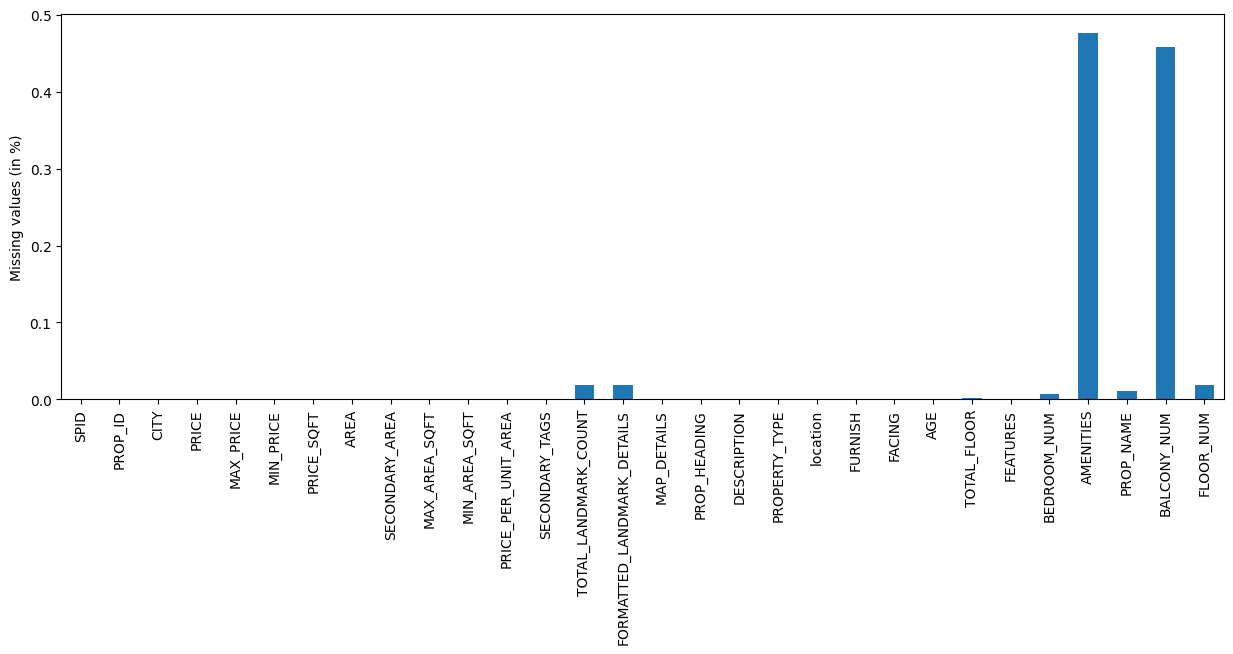

In [8]:
(
    df.isnull()
    .sum()
    .div(df.shape[0])
    .plot(kind='bar', figsize=(15, 5), ylabel='Missing values (in %)')
)

## Price and Area

In [9]:
price_cols = ['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT']
area_cols = ['AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT', 'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA']

price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

In [10]:
df[(df['MIN_PRICE'].sub(df['MAX_PRICE']) > 0) | (df['MIN_AREA_SQFT'].sub(df['MAX_AREA_SQFT']) > 0)]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


If `('MAX_*' - 'MIN_*' == 0)` this means both features contains same values. You can use anyone of them.

In [11]:
df[(df['PRICE_PER_UNIT_AREA'].sub(df['PRICE_SQFT']) > 0)]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [12]:
df[['AREA', 'SECONDARY_AREA']].sample(7)

,AREA,SECONDARY_AREA
2510,451 sq.ft.,41.9 sq.m.
8999,1385 sq.ft.,128.67 sq.m.
5929,750 sq.ft.,69.68 sq.m.
2190,1994-2126 sq.ft.,185.25-197.51 sq.m.
6585,2100 sq.ft.,195.1 sq.m.
7401,577 sq.ft.,53.61 sq.m.
4991,1087 sq.ft.,100.99 sq.m.


In [13]:
df[~df['AREA'].str.contains('sq.ft.')]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [14]:
df[~df['SECONDARY_AREA'].str.contains('sq.m.')]

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


In [15]:
df[['PRICE', 'MIN_PRICE']].sample(7)

,PRICE,MIN_PRICE
5941,1.02 - 1.05 Cr,10152800
6565,5.48 - 6.28 Cr,54835000
1899,1.1 - 1.29 Cr,11000880
7055,33 L,3300000
193,"26,000/Bed",26000
6309,4.28 Cr,42800000
8164,1.05 Cr,10500000


Here, `MIN_PRICE` is integer value of `PRICE` column which is in string value.

In [16]:
df['PRICE'].nunique()

2933

In [17]:
df['PRICE'].str.split().str.get(-1).unique()[:80]

array(['Cr', 'L', '20,000/Bedroom', '8,000/Bed', '7,500/Bed', '6,000/Bed',
       '5,000/Bed', '25,000/Bedroom', '16,500/Bed', '11,000/Bed',
       '16,000/Bedroom', '8,500/Bed', '4,000/Bedroom', '75,000',
       '14,000/Bed', '14,000/Bedroom', '45,000/Bedroom', '5,500/Bed',
       '13,000/Bed', '10,000/Bed', '25,000/Bed', '12,000/Bed',
       '32,000/Bedroom', '7,000/Bed', '15,000/Bed', '6,500/Bed',
       '30,000/Bed', '5,999/Bed', '35,000/Bed', '4,000/Bed',
       '5,500/Bedroom', '29,100/Bedroom', '8,001/Bed', '26,000/Bedroom',
       '27,000/Bedroom', '16,000/Bed', '23,300/Bedroom', '21,000/Bed',
       '33,000/Bedroom', '3,800/Bedroom', '3,999/Bed', '11,000/Bedroom',
       '22,000/Bedroom', '12,000/Bedroom', '9,000/Bed', '23,000/Bedroom',
       '4,500/Bed', '8,200/Bed', '40,000/Bed', '15,000/Bedroom',
       '32,000/Bed', '17,000/Bed', '20,000/Bed', '18,000/Bed',
       '45,000/Bed', '6,999/Bed', 'Request', '14,500/Bed', '14,250/Bed',
       '26,000/Bed', '24,500/Bed', '22,500/

In [18]:
# These properties PRICE is not available
df[df['PRICE'].str.contains(r'\d') == False].head(5)

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
185,66275460,J66275460,Mumbai Andheri-Dahisar,Price on Request,0,0,0.0,2400 sq.ft.,222.97 sq.m.,222.967200,...,0,0,5,57.0,N,4.0,NaN,Elysian by Oberoi Realty,NaN,1
467,67096488,D67096488,Central Mumbai suburbs,Price on Request,0,0,0.0,1415 sq.ft.,131.46 sq.m.,131.457745,...,0,0,6,60.0,N,3.0,NaN,Enigma by Oberoi Realty,NaN,1
877,68375652,D68375652,Mumbai Harbour,Price on Request,0,0,0.0,1768 sq.ft.,164.25 sq.m.,164.252504,...,0,0,5,40.0,N,4.0,NaN,Lodha Aura New Cuffe Parade,NaN,1
1142,68736014,M68736014,Mumbai Beyond Thane,Price on Request,0,0,0.0,526-659 sq.ft.,48.87-61.22 sq.m.,61.223077,...,0,0,5,13.0,N,2.0,NaN,Empire Centrum,NaN,1
1189,69630108,D69630108,Mira Road And Beyond,Price on Request,0,0,0.0,800 sq.ft.,74.32 sq.m.,74.322400,...,0,0,5,11.0,N,3.0,NaN,SK Imperial Garden,NaN,1


In [19]:
df[['AREA', 'SECONDARY_AREA', 'MIN_AREA_SQFT']].sample(7)

,AREA,SECONDARY_AREA,MIN_AREA_SQFT
6632,1926 sq.ft.,178.93 sq.m.,178.931178
8125,575 sq.ft.,53.42 sq.m.,53.419225
7991,505-559 sq.ft.,46.92-51.93 sq.m.,46.916015
8675,525 sq.ft.,48.77 sq.m.,48.774075
3398,820 sq.ft.,76.18 sq.m.,76.180460
9059,936 sq.ft.,86.96 sq.m.,86.957208
3562,446 sq.ft.,41.43 sq.m.,41.434738


In [20]:
df[
    ['PRICE', 'PRICE_SQFT', 'PRICE_PER_UNIT_AREA', 'AREA', 'MAX_AREA_SQFT', 'SECONDARY_AREA']
].sample(7)

,PRICE,PRICE_SQFT,PRICE_PER_UNIT_AREA,AREA,MAX_AREA_SQFT,SECONDARY_AREA
1662,1.65 Cr,10294.0,10294.0,1700 sq.ft.,157.935100,157.94 sq.m.
1079,2 Cr,19361.0,19361.0,1033 sq.ft.,95.968799,95.97 sq.m.
7630,1.5 L,142.0,142.0,1050 sq.ft.,97.548150,97.55 sq.m.
2109,17.49 Cr,63026.0,63026.0,2775 sq.ft.,257.805825,257.81 sq.m.
7937,40 L,5882.0,5882.0,680 sq.ft.,63.174040,63.17 sq.m.
6059,1.97 Cr,38252.0,38252.0,515 sq.ft.,47.845045,47.85 sq.m.
1096,80 - 82.64 L,12598.0,12598.0,635-656 sq.ft.,60.944368,58.99-60.94 sq.m.


## Extra

In [21]:
df[['TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS']].sample(7)

,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS
565,50.0,"[{'text': '1 Parking'}, {'text': '1 Religious ..."
7543,49.0,"[{'text': '1 Parking'}, {'text': '2 ATMs'}, {'..."
2722,49.0,"[{'text': '2 Shoppings'}, {'text': '4 Religiou..."
1946,4.0,"[{'text': '1 Shopping'}, {'text': '3 Miscellan..."
3523,8.0,"[{'text': '1 Railway Station'}, {'text': '1 Me..."
3321,1.0,[{'text': '1 Connectivity'}]
1353,50.0,"[{'text': '11 Religious Places'}, {'text': '25..."


In [22]:
df['SECONDARY_TAGS'].apply(literal_eval).explode().unique()

array(['READY TO MOVE', 'RESALE', 'CORNER PROPERTY', 'NORTH-EAST FACING',
       'CIDC APPROVED', 'FURNISHED', 'PRIVATE ROOM', 'SHARED BY 2',
       'SHARED BY 3', 'SHARED BY 4', 'RERA', 'FOR SINGLE MEN',
       'FOR SINGLE WOMEN', 'SHARED BY 5', 'UNDER CONSTRUCTION',
       'NEW BOOKING', 'NEW LAUNCH', 'NORTH FACING', 'IN GATED COMMUNITY',
       nan, 'EAST FACING', 'AUTHORITY APPROVED', 'MMRDA APPROVED',
       'RCUDA APPROVED', 'MCGM APPROVED'], dtype=object)

In [23]:
df['MAP_DETAILS'].sample(7).apply(literal_eval).tolist()

[{'LATITUDE': '18.94145', 'LONGITUDE': '73.18034'},
 {'LATITUDE': '19.171174', 'LONGITUDE': '72.850939'},
 {'LATITUDE': '19.185427', 'LONGITUDE': '72.944615'},
 {'LATITUDE': '19.28188', 'LONGITUDE': '72.886298'},
 {'LATITUDE': '19.083187492096', 'LONGITUDE': '72.999368263955'},
 {'LATITUDE': '19.221539', 'LONGITUDE': '72.8614303'},
 {'LATITUDE': '19.03443', 'LONGITUDE': '72.85758'}]

In [24]:
df['AMENITIES'].sample(7)

7479                                                  NaN
5243    17,5,21,32,44,45,24,47,39,29,19,6,9,40,41,42,3...
8334    10,32,17,5,8,20,21,44,23,45,24,46,47,29,30,39,...
8876    17,2,5,20,21,44,23,45,46,29,6,9,40,41,42,26,31...
1274                                                  NaN
187                              2,21,32,23,6,39,19,9,103
796     10,32,17,5,8,20,21,44,23,45,24,46,29,30,19,1,6...
Name: AMENITIES, dtype: object

In [25]:
df['AMENITIES'].sample(7).str.split(',').str.len()

6268    11.0
6166     NaN
1546     NaN
3035     6.0
8671     9.0
7696    15.0
403     17.0
Name: AMENITIES, dtype: float64

In [26]:
df['AGE'].value_counts()

AGE
5    3812
1    2027
6    1414
3    1106
2    1090
0      65
Name: count, dtype: int64

### FACING

| id  | label      |
| --- | ---------- |
| 1   | North      |
| 2   | South      |
| 3   | East       |
| 4   | West       |
| 5   | North-East |
| 6   | North-West |
| 7   | South-East |
| 8   | South-West |

**Maybe `0` means `NaN | Undefined`**

In [27]:
df['FACING'].value_counts()

FACING
0    5376
3    1814
5     821
4     562
1     354
2     176
6     155
7     132
8     124
Name: count, dtype: int64

In [28]:
df['location'].sample(3).apply(literal_eval).tolist()

[{'CITY': '15',
  'CITY_NAME': 'Navi Mumbai',
  'BUILDING_ID': '13902',
  'BUILDING_NAME': 'Haware Glory',
  'SOCIETY_NAME': 'Haware Glory',
  'LOCALITY_ID': '1064',
  'LOCALITY_NAME': 'Kharghar',
  'ADDRESS': None},
 {'CITY': '218',
  'CITY_NAME': 'Mumbai Andheri-Dahisar',
  'BUILDING_ID': '0',
  'BUILDING_NAME': 'vahatuk nagar housing society ',
  'SOCIETY_NAME': 'vahatuk nagar housing society ',
  'LOCALITY_ID': '1162',
  'LOCALITY_NAME': 'Amboli',
  'ADDRESS': None},
 {'CITY': '15',
  'CITY_NAME': 'Navi Mumbai',
  'BUILDING_ID': '12826',
  'BUILDING_NAME': 'Devkrupa Dev Enclave',
  'SOCIETY_NAME': 'Devkrupa Dev Enclave',
  'LOCALITY_ID': '28935',
  'LOCALITY_NAME': 'Sector 35E Kharghar',
  'ADDRESS': None}]

In [29]:
# df['SOCIETY_NAME'] = df['location'].apply(literal_eval).str.get('SOCIETY_NAME')
# df['LOCALITY_NAME'] = df['location'].apply(literal_eval).str.get('LOCALITY_NAME')
# df['CITY_NAME'] = df['location'].apply(literal_eval).str.get('CITY_NAME')

In [30]:
df['PROP_HEADING'].sample(7)

2109                  4 BHK Flat in Worli
4628            3 BHK Flat in Mulund West
7336               3 BHK Flat in Kharghar
1675               2 BHK Flat in Ghansoli
6480             2 BHK Flat in New Panvel
6959    2 BHK Flat in Hatkesh Udhog Nagar
2592           1 BHK Flat in Vartak Nagar
Name: PROP_HEADING, dtype: object

In [31]:
df['DESCRIPTION'].sample(7)

7517    A spacious 3 bhk flat for rent is available in...
364     Good location nice view other details please c...
5701    LK Vivanta is a residential project, offering ...
2818    Apartment available for rent in mankhurd, mumb...
1673    This well-known project offers 1 BHK apartment...
3076    This well-known project offers 2 BHK apartment...
337     Co-Living spaces available in powai, mumbai!\n...
Name: DESCRIPTION, dtype: object

In [32]:
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
Residential Apartment        9126
Studio Apartment              137
Independent House/Villa       108
Residential Land               60
Serviced Apartments            44
Independent/Builder Floor      34
Farm House                      5
Name: count, dtype: int64

In [33]:
df['PROP_NAME'].sample(7)

2727    Gee Villa Society R.H.No.12A Sec-2b Airoli
4768                                     Hillcrest
1002                               Nestaway-324126
6550                                 Romell Allure
4580                             Millenium Infinia
6488                                 Sheth 72 West
4566                   venkateshwara chs ghansoli,
Name: PROP_NAME, dtype: object

In [34]:
df['BALCONY_NUM'].value_counts()

BALCONY_NUM
0.0    2019
1.0    1497
2.0     736
3.0     580
4.0     325
Name: count, dtype: int64

In [35]:
df['FLOOR_NUM'].value_counts()[:10]

FLOOR_NUM
1     4651
3      486
2      413
4      397
5      351
7      301
6      292
10     253
9      211
8      206
Name: count, dtype: int64

In [36]:
df['BEDROOM_NUM'].value_counts()

BEDROOM_NUM
2.0     3773
3.0     2394
1.0     2341
4.0      749
5.0      129
6.0       40
7.0        6
8.0        5
10.0       4
15.0       3
9.0        3
30.0       2
60.0       2
40.0       1
50.0       1
Name: count, dtype: int64

In [37]:
df['TOTAL_FLOOR'].value_counts().iloc[:10]

TOTAL_FLOOR
20.0    757
7.0     663
22.0    357
15.0    350
23.0    346
14.0    330
16.0    302
4.0     297
13.0    284
18.0    278
Name: count, dtype: int64